In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline


In [6]:
#DATA preprocessing
#Load dataset
x_data = pd.read_csv(r'C:\Users\chongs\BDANALYSIS\furnace_bd.csv')
x_data = x_data.iloc[:,2:]
#epoch time 수정
x_data['3'] = x_data['3'].astype(str).str[:-3].astype(np.int64)
x_data['3'] = x_data['3'].astype(str).str[4:].astype(np.int64)

#구간 선택
x_data = x_data[x_data['3'].values > 890472]
x_data = x_data[x_data['3'].values < 899000]

#pivot table 사용 query 진행
x_data = x_data.pivot_table(index = x_data['3'],columns = x_data['1'])
#dataframe 재설정
x_data = x_data['2'][['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16', 'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8', 'temp_zone7_top', 'temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31', 'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37', 'temp_zone8_top']]
x_data = x_data.interpolate()

y_data = pd.read_csv(r"C:\Users\chongs\BDANALYSIS\14_Gls_org.csv", engine = 'python', index_col = False)
#원하는 columns 선택

y_data['time'] = y_data['날짜'] + ' ' + y_data['시간']

#시간 delay 수정 및 epoch 시간으로 convert
total_delay = dt.timedelta(minutes = 8, seconds=5)

y_data['time']=(pd.to_datetime(y_data['time']) - total_delay).apply(dt.datetime.timestamp).astype(np.int64)
y_data['time'] = y_data['time'].astype(str).str[4:].astype(np.int64)

y_data = y_data[['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

y_data.set_index('time', inplace = True)


# X, Y data의 index를 y_data의 인덱스에 맞춰 Join 실행(NaN 값 : drop)
xy = pd.concat([x_data, y_data], axis=1, join='inner', join_axes = [x_data.index] )
xy.dropna(inplace=True)

#x,y값 재추출
# x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
#        'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
#        'temp_zone8_33', 'temp_zone8_35']]

x = xy[['temp_zone8_31']]
# y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]
y = xy[['G']]

In [7]:
# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

In [12]:
# MultiOutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

mor = MultiOutputRegressor(SVR(kernel='rbf', C=10, gamma=0.1))
mor.fit(X_train, y_train)
mor.score(X_test,y_test)

0.7731242613008129

maximum score :  0.7731242613008129
max scored C :  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4
 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2
 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.
 9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


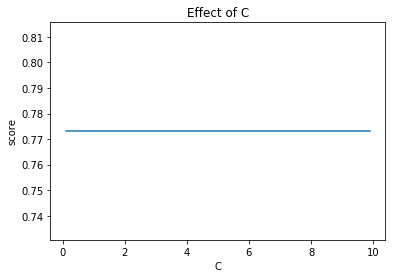

In [16]:
# MultiOutput regressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor


C = np.arange(0.1, 10, 0.1)
scores = []
for n in C:
       
    regressor = MultiOutputRegressor(SVR(kernel='rbf', C=10, gamma=0.1))
    regressor.fit(X_train, y_train)
    
    scores.append(regressor.score(X_test, y_test))

plt.title("Effect of C")
plt.xlabel("C")
plt.ylabel("score")
plt.plot(C, scores)
print('maximum score : ', np.max(scores))
print('max scored C : ', C[np.where(scores == np.max(scores))])
#degree : 2 에서 최적의 score를 얻을 수있다.

In [29]:
# MultiOutput regressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor


gamma = np.arange(0.1, 1, 0.1)
scores = []
for n in gamma:
       
    regressor = MultiOutputRegressor(SVR(kernel='rbf', C=10, gamma=0.1))
    regressor.fit(X_train, y_train)
    regressor.set_params(gamma = n)
    
    scores.append(regressor.score(X_test, y_test))

plt.title("Effect of gamma")
plt.xlabel("gamma")
plt.ylabel("score")
plt.plot(gamma, scores)
# print('maximum score : ', np.max(scores))
# print('max scored gamma : ', gamma[np.where(scores == np.max(scores))])
#degree : 2 에서 최적의 score를 얻을 수있다.

ValueError: Invalid parameter gamma for estimator MultiOutputRegressor(estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1). Check the list of available parameters with `estimator.get_params().keys()`.

In [12]:
from sklearn.metrics import r2_score
y_train_pred_mor = mor.predict(X_train)
y_test_pred_mor = mor.predict(X_test)

r2_train_mor = r2_score(y_train, y_train_pred_mor)
r2_test_mor = r2_score(y_test, y_test_pred_mor)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_mor, r2_test_mor))

R2 - Train : 0.790, Test: 0.807


In [13]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_test,y_test)

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8071528486233155

In [9]:
from sklearn.svm import SVR

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=10, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
# y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
# y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


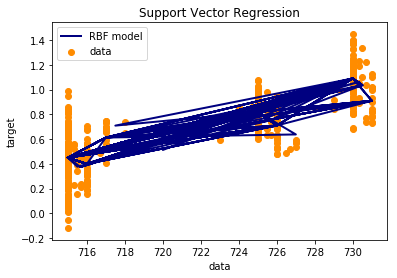

In [10]:
# Look at the results
lw = 2
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_test, y_rbf, color='navy', lw=lw, label
         ='RBF model')
# plt.plot(X_test, y_lin, color='c', lw=lw, label='Linear model')
# plt.plot(X_test, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_test, y_rbf, color='navy', lw=lw, label
         ='RBF model')
plt.plot(X_test, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_test, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()